<a href="https://colab.research.google.com/github/fornieligulo/Algiritma_NBC/blob/main/_TUTOR_PRE_PROCESSING_DATA_X(TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MEMBACA DATASET HASIL CRAWLING KEYWORD TIKTOKSHOP***

In [ ]:
import pandas as pd

data = pd.read_csv("DatasetKeyTikTokShop.csv", sep=";")
data.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Oct 19 23:43:49 +0000 2023,1715151797575447009,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,0,2,0,17,in,297302790,1715145858453540969,nasipakde,https://twitter.com/nasipakde/status/171515179...
1,Thu Oct 19 17:26:42 +0000 2023,1715056895264993499,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,0,0,0,0,in,1646386392321368064,1715056895264993499,Cariakudotcom,https://twitter.com/Cariakudotcom/status/17150...


# ***CEK INFORMASI DATASET***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           2010 non-null   object
 1   id_str               2010 non-null   int64 
 2   full_text            2010 non-null   object
 3   quote_count          2010 non-null   int64 
 4   reply_count          2010 non-null   int64 
 5   retweet_count        2010 non-null   int64 
 6   favorite_count       2010 non-null   int64 
 7   lang                 2010 non-null   object
 8   user_id_str          2010 non-null   int64 
 9   conversation_id_str  2010 non-null   int64 
 10  username             2010 non-null   object
 11  tweet_url            2010 non-null   object
dtypes: int64(7), object(5)
memory usage: 188.6+ KB


# **STATISTIK DATASET**

In [ ]:
summary = data.describe()
summary.head()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,2.010000e+03,2010.00000,2010.000000,2010.000000,2010.000000,2.010000e+03,2.010000e+03
mean,1.710517e+18,0.60796,1.697512,3.607463,18.126866,7.198768e+17,1.710479e+18
std,1.273248e+15,9.76761,16.352271,65.130803,264.450670,6.931910e+17,1.279868e+15
min,1.709222e+18,0.00000,0.000000,0.000000,0.000000,1.558066e+07,1.706622e+18
25%,1.709534e+18,0.00000,0.000000,0.000000,0.000000,2.840409e+08,1.709526e+18


# ***VIS ORIGINAL DATA WORDCLOUD & FREKUENSI KATA***

**Wordcloud**

---



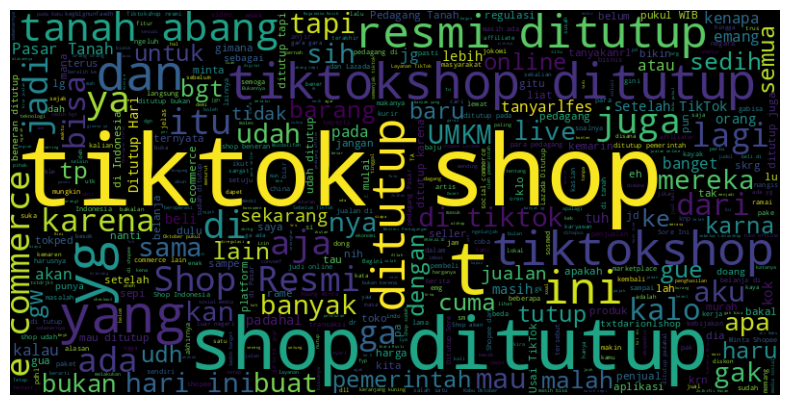

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = ' '.join(data['full_text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Menghitung Frekuensi Kata**

---



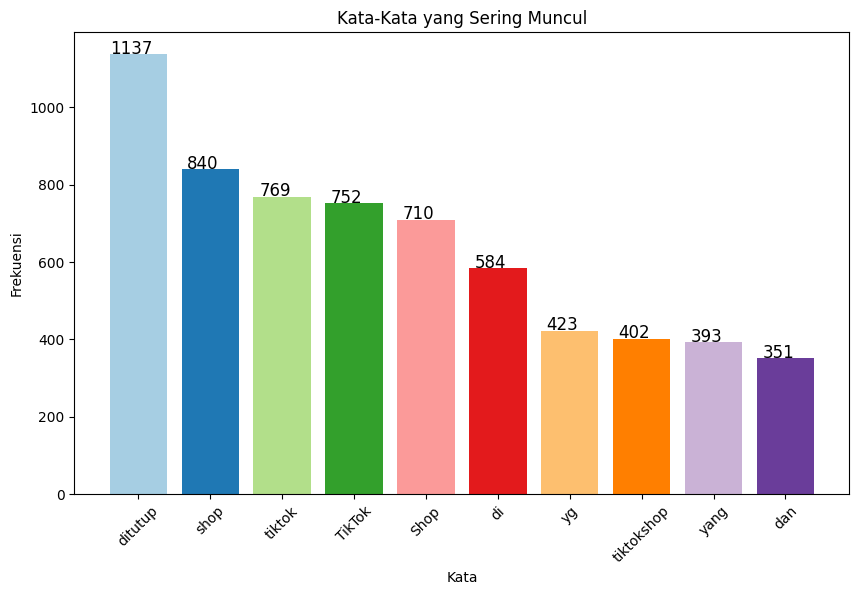

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)


colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

# ***PRE-PROCESING DATA***

**Silahkan masukan dataset ke dalam dataframe. DataFrame adalah menyimpan dan mengelola data dalam bentuk tabel yang terorganisir**

In [ ]:
df  = pd.DataFrame(data[['full_text']])
df.head(1000)

,full_text
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...
2,@Barudakbabi Pantes pada mewek tiktok shop dit...
3,"@Iavinia Merenung Tiktok shop ditutup, ya?"
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...
...,...
995,Bukan hanya tiktok shop aja kali yg jadi dampa...
996,@Official_PAN Jelek banget transisinya langsun...
997,Hai kamu! Belanja produk dari Hush Puppies dis...
998,"TikTok Shop telah ditutup sejak kemarin, Rabu ..."


**CLEANING**

---



In [ ]:
import re
import string
import nltk

def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    tweet = re.sub('[0-9]+', '', tweet)

    tweet = re.sub(r'\$\w*', '', tweet)

    tweet = re.sub(r'^RT[\s]+', '', tweet)

    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

df['cleasing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_html(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_emoji(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_punct(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_angka(x))

df.head(411)

,full_text,cleasing
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,txtdarionlshop Harusnya ditutup gak sih Krn in...
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...
2,@Barudakbabi Pantes pada mewek tiktok shop dit...,Barudakbabi Pantes pada mewek tiktok shop ditu...
3,"@Iavinia Merenung Tiktok shop ditutup, ya?",Iavinia Merenung Tiktok shop ditutup ya
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...,hrdbacot “Saya lihat di cv kamu ada gap ya set...
...,...,...
406,"VIRAL! Usai Tiktok Shop Tutup, Pedagang Tanah ...",VIRAL Usai Tiktok Shop Tutup Pedagang Tanah Ab...
407,@txtdrjkt Lu kira se Indonesia belanjanya di t...,txtdrjkt Lu kira se Indonesia belanjanya di ta...
408,@tanyakanrl Tiktok shop harusnya bisa gak ditu...,tanyakanrl Tiktok shop harusnya bisa gak ditut...
409,"Kemarin Minta TikTok Shop ditutup, Kita Turuti...",Kemarin Minta TikTok Shop ditutup Kita Turutin...


**CASE FOLDING AND TOKENIZATION**

In [ ]:
df['Tokenization and Case Folding'] = df['cleasing'].apply(lambda x: x.lower().split())
df.head(411)

,full_text,cleasing,Tokenization and Case Folding
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,txtdarionlshop Harusnya ditutup gak sih Krn in...,"[txtdarionlshop, harusnya, ditutup, gak, sih, ..."
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,"[dari, omzet, ratusan, ribu, melejit, ke, juta..."
2,@Barudakbabi Pantes pada mewek tiktok shop dit...,Barudakbabi Pantes pada mewek tiktok shop ditu...,"[barudakbabi, pantes, pada, mewek, tiktok, sho..."
3,"@Iavinia Merenung Tiktok shop ditutup, ya?",Iavinia Merenung Tiktok shop ditutup ya,"[iavinia, merenung, tiktok, shop, ditutup, ya]"
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...,hrdbacot “Saya lihat di cv kamu ada gap ya set...,"[hrdbacot, “saya, lihat, di, cv, kamu, ada, ga..."
...,...,...,...
406,"VIRAL! Usai Tiktok Shop Tutup, Pedagang Tanah ...",VIRAL Usai Tiktok Shop Tutup Pedagang Tanah Ab...,"[viral, usai, tiktok, shop, tutup, pedagang, t..."
407,@txtdrjkt Lu kira se Indonesia belanjanya di t...,txtdrjkt Lu kira se Indonesia belanjanya di ta...,"[txtdrjkt, lu, kira, se, indonesia, belanjanya..."
408,@tanyakanrl Tiktok shop harusnya bisa gak ditu...,tanyakanrl Tiktok shop harusnya bisa gak ditut...,"[tanyakanrl, tiktok, shop, harusnya, bisa, gak..."
409,"Kemarin Minta TikTok Shop ditutup, Kita Turuti...",Kemarin Minta TikTok Shop ditutup Kita Turutin...,"[kemarin, minta, tiktok, shop, ditutup, kita, ..."


***FILTERING ATAU STOPWORD REMOVAL***

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))
df.head(411)

,full_text,cleasing,Tokenization and Case Folding,Filtering/stopword removal
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,txtdarionlshop Harusnya ditutup gak sih Krn in...,"[txtdarionlshop, harusnya, ditutup, gak, sih, ...","[txtdarionlshop, ditutup, gak, sih, krn, aja, ..."
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,"[dari, omzet, ratusan, ribu, melejit, ke, juta...","[omzet, ratusan, ribu, melejit, jutaan, rupiah..."
2,@Barudakbabi Pantes pada mewek tiktok shop dit...,Barudakbabi Pantes pada mewek tiktok shop ditu...,"[barudakbabi, pantes, pada, mewek, tiktok, sho...","[barudakbabi, pantes, mewek, tiktok, shop, dit..."
3,"@Iavinia Merenung Tiktok shop ditutup, ya?",Iavinia Merenung Tiktok shop ditutup ya,"[iavinia, merenung, tiktok, shop, ditutup, ya]","[iavinia, merenung, tiktok, shop, ditutup, ya]"
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...,hrdbacot “Saya lihat di cv kamu ada gap ya set...,"[hrdbacot, “saya, lihat, di, cv, kamu, ada, ga...","[hrdbacot, “saya, lihat, cv, gap, ya, resign, ..."
...,...,...,...,...
406,"VIRAL! Usai Tiktok Shop Tutup, Pedagang Tanah ...",VIRAL Usai Tiktok Shop Tutup Pedagang Tanah Ab...,"[viral, usai, tiktok, shop, tutup, pedagang, t...","[viral, tiktok, shop, tutup, pedagang, tanah, ..."
407,@txtdrjkt Lu kira se Indonesia belanjanya di t...,txtdrjkt Lu kira se Indonesia belanjanya di ta...,"[txtdrjkt, lu, kira, se, indonesia, belanjanya...","[txtdrjkt, lu, indonesia, belanjanya, tanah, a..."
408,@tanyakanrl Tiktok shop harusnya bisa gak ditu...,tanyakanrl Tiktok shop harusnya bisa gak ditut...,"[tanyakanrl, tiktok, shop, harusnya, bisa, gak...","[tanyakanrl, tiktok, shop, gak, ditutup, langs..."
409,"Kemarin Minta TikTok Shop ditutup, Kita Turuti...",Kemarin Minta TikTok Shop ditutup Kita Turutin...,"[kemarin, minta, tiktok, shop, ditutup, kita, ...","[kemarin, tiktok, shop, ditutup, turutin, ecom..."


***STEAMMING DATA***

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['Filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(411)

,full_text,cleasing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,txtdarionlshop Harusnya ditutup gak sih Krn in...,"[txtdarionlshop, harusnya, ditutup, gak, sih, ...","[txtdarionlshop, ditutup, gak, sih, krn, aja, ...",txtdarionlshop tutup gak sih krn aja kayak tik...
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,"[dari, omzet, ratusan, ribu, melejit, ke, juta...","[omzet, ratusan, ribu, melejit, jutaan, rupiah...",omzet ratus ribu lejit juta rupiah dagang offl...
2,@Barudakbabi Pantes pada mewek tiktok shop dit...,Barudakbabi Pantes pada mewek tiktok shop ditu...,"[barudakbabi, pantes, pada, mewek, tiktok, sho...","[barudakbabi, pantes, mewek, tiktok, shop, dit...",barudakbabi pantes mewek tiktok shop tutup wal...
3,"@Iavinia Merenung Tiktok shop ditutup, ya?",Iavinia Merenung Tiktok shop ditutup ya,"[iavinia, merenung, tiktok, shop, ditutup, ya]","[iavinia, merenung, tiktok, shop, ditutup, ya]",iavinia renung tiktok shop tutup ya
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...,hrdbacot “Saya lihat di cv kamu ada gap ya set...,"[hrdbacot, “saya, lihat, di, cv, kamu, ada, ga...","[hrdbacot, “saya, lihat, cv, gap, ya, resign, ...",hrdbacot saya lihat cv gap ya resign oktober n...
...,...,...,...,...,...
406,"VIRAL! Usai Tiktok Shop Tutup, Pedagang Tanah ...",VIRAL Usai Tiktok Shop Tutup Pedagang Tanah Ab...,"[viral, usai, tiktok, shop, tutup, pedagang, t...","[viral, tiktok, shop, tutup, pedagang, tanah, ...",viral tiktok shop tutup dagang tanah abang sho...
407,@txtdrjkt Lu kira se Indonesia belanjanya di t...,txtdrjkt Lu kira se Indonesia belanjanya di ta...,"[txtdrjkt, lu, kira, se, indonesia, belanjanya...","[txtdrjkt, lu, indonesia, belanjanya, tanah, a...",txtdrjkt lu indonesia belanja tanah abang doan...
408,@tanyakanrl Tiktok shop harusnya bisa gak ditu...,tanyakanrl Tiktok shop harusnya bisa gak ditut...,"[tanyakanrl, tiktok, shop, harusnya, bisa, gak...","[tanyakanrl, tiktok, shop, gak, ditutup, langs...",tanyakanrl tiktok shop gak tutup langsung kasi...
409,"Kemarin Minta TikTok Shop ditutup, Kita Turuti...",Kemarin Minta TikTok Shop ditutup Kita Turutin...,"[kemarin, minta, tiktok, shop, ditutup, kita, ...","[kemarin, tiktok, shop, ditutup, turutin, ecom...",kemarin tiktok shop tutup turutin ecommerce tu...


***DROP DATA DUPLICATES***

In [ ]:
df.drop_duplicates(subset ="stemming_data", keep = 'first', inplace = True)
df.head(411)

,full_text,cleasing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data
0,@txtdarionlshop Harusnya ditutup gak sih? Krn ...,txtdarionlshop Harusnya ditutup gak sih Krn in...,"[txtdarionlshop, harusnya, ditutup, gak, sih, ...","[txtdarionlshop, ditutup, gak, sih, krn, aja, ...",txtdarionlshop tutup gak sih krn aja kayak tik...
1,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,Dari Omzet Ratusan Ribu Melejit ke Jutaan Rupi...,"[dari, omzet, ratusan, ribu, melejit, ke, juta...","[omzet, ratusan, ribu, melejit, jutaan, rupiah...",omzet ratus ribu lejit juta rupiah dagang offl...
2,@Barudakbabi Pantes pada mewek tiktok shop dit...,Barudakbabi Pantes pada mewek tiktok shop ditu...,"[barudakbabi, pantes, pada, mewek, tiktok, sho...","[barudakbabi, pantes, mewek, tiktok, shop, dit...",barudakbabi pantes mewek tiktok shop tutup wal...
3,"@Iavinia Merenung Tiktok shop ditutup, ya?",Iavinia Merenung Tiktok shop ditutup ya,"[iavinia, merenung, tiktok, shop, ditutup, ya]","[iavinia, merenung, tiktok, shop, ditutup, ya]",iavinia renung tiktok shop tutup ya
4,@hrdbacot “Saya lihat di cv kamu ada gap ya se...,hrdbacot “Saya lihat di cv kamu ada gap ya set...,"[hrdbacot, “saya, lihat, di, cv, kamu, ada, ga...","[hrdbacot, “saya, lihat, cv, gap, ya, resign, ...",hrdbacot saya lihat cv gap ya resign oktober n...
...,...,...,...,...,...
411,@tanyakanrl Tiktok shop masih oke ditutup. Tp ...,tanyakanrl Tiktok shop masih oke ditutup Tp ka...,"[tanyakanrl, tiktok, shop, masih, oke, ditutup...","[tanyakanrl, tiktok, shop, oke, ditutup, tp, e...",tanyakanrl tiktok shop oke tutup tp e commerce...
412,"Sebelumnya, viralnya video jeritan"" pedagang T...",Sebelumnya viralnya video jeritan pedagang Tan...,"[sebelumnya, viralnya, video, jeritan, pedagan...","[viralnya, video, jeritan, pedagang, tanah, ab...",viralnya video jerit dagang tanah abang tiktok...
413,Setelah TikTok Kini Shopee dan Lazada Diminta ...,Setelah TikTok Kini Shopee dan Lazada Diminta ...,"[setelah, tiktok, kini, shopee, dan, lazada, d...","[tiktok, shopee, lazada, tutup, viral, media, ...",tiktok shopee lazada tutup viral media sosial ...
414,Setelah tiktok shop tanah abang minta shopee d...,Setelah tiktok shop tanah abang minta shopee d...,"[setelah, tiktok, shop, tanah, abang, minta, s...","[tiktok, shop, tanah, abang, shopee, lazada, d...",tiktok shop tanah abang shopee lazada tutup ha...


# ***SAVE DATASET HASIL PRE-PROCESSING DATA***

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False)

# ***VIS ORIGINAL DATA WORDCLOUD & FREKUENSI KATA***

**WORDCLOUD**

---



In [ ]:
data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      1947 non-null   object
 1   cleasing                       1947 non-null   object
 2   Tokenization and Case Folding  1947 non-null   object
 3   Filtering/stopword removal     1947 non-null   object
 4   stemming_data                  1947 non-null   object
dtypes: object(5)
memory usage: 76.2+ KB


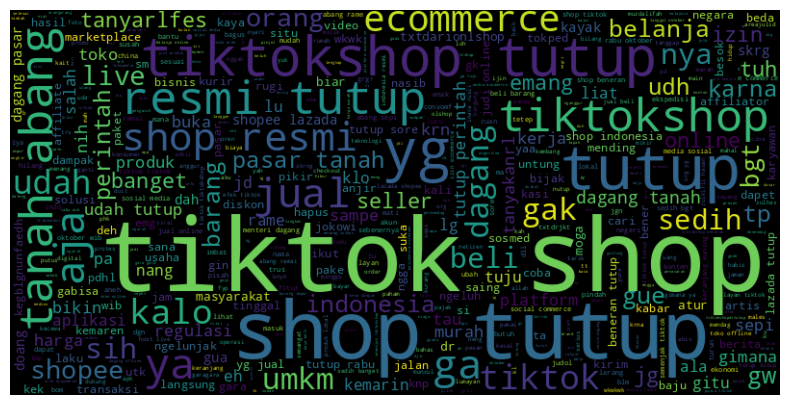

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = ' '.join(data['stemming_data'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**FREKUENSI KATA**

---



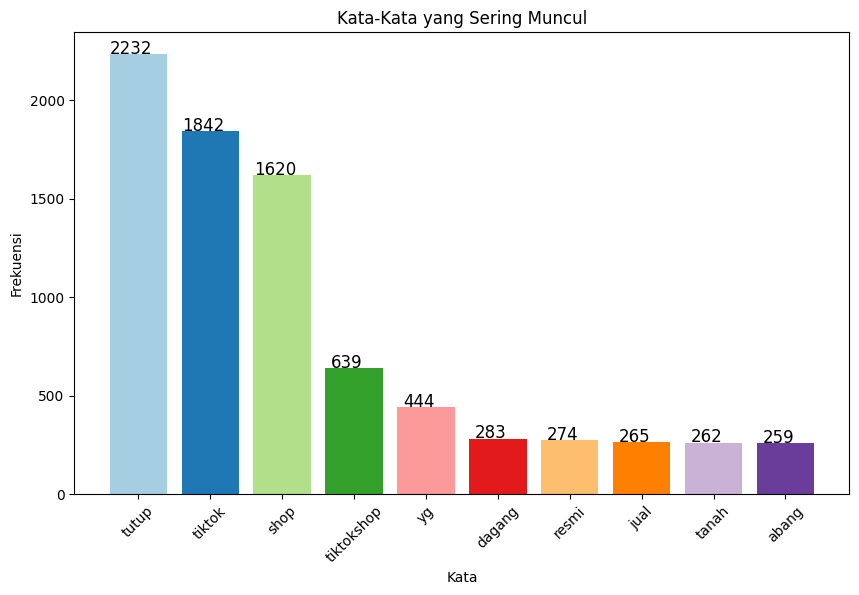

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["stemming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()